In [2]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 2.1 MB/s eta 0:00:002.3 MB/s eta 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 2.1 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 608.7 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.7 MB/s eta 0:00:000:00:01m eta 0:00:010m
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


Hello
This is a Jupyter Notebook

In [103]:
def get_earningscall_secret_api_key():
    with open(".earnings-call-api-key", "r") as fd:
        return fd.read().strip()

In [104]:
import earningscall

earningscall.api_key = get_earningscall_secret_api_key()

In [105]:
from earningscall import get_company, get_sp500_companies
from earningscall.company import Company

from textblob import TextBlob


# Initialize the Earnings Call API
company = get_company("AAPL")

# Fetch the transcript of a specific earnings call
transcript = company.get_transcript(quarter=1, year=2024)

In [106]:
from textblob import TextBlob

# Perform sentiment analysis on the transcript
blob = TextBlob(transcript.text)
sentiment = blob.sentiment

# Print the results
print(sentiment)
print(f"Sentiment Polarity: {sentiment.polarity}")
print(f"Sentiment Subjectivity: {sentiment.subjectivity}")

Sentiment(polarity=0.18496337217726486, subjectivity=0.46769073323131016)
Sentiment Polarity: 0.18496337217726486
Sentiment Subjectivity: 0.46769073323131016


In [107]:
def get_datapoints(company: Company):
    for event in company.events():
        transcript = company.get_transcript(event=event)  # Fetch the earnings call transcript for this event
        blob = TextBlob(transcript.text)
        sentiment = blob.sentiment
        x = sentiment.polarity
        y = sentiment.subjectivity
        yield [x, y]

In [108]:
my_array = np.array(list(get_datapoints(company)))

In [117]:
def get_all_datapoints():
    for company in get_sp500_companies():
        print(company)
        for datapoint in get_datapoints(company):
            yield datapoint

In [115]:
all_datapoints = get_all_datapoints()

In [116]:
list(all_datapoints)

Microsoft Corporation
Apple Inc.


[[0.14328309647916082, 0.4125673172794164],
 [0.1297078018535239, 0.39548913504795796],
 [0.15400998993696371, 0.41489592067289477],
 [0.12493072632237293, 0.3984810592958293],
 [0.1330175239073546, 0.3895510096161985],
 [0.10798712125879005, 0.3987693969822049],
 [0.1281459021055105, 0.4144697278785409],
 [0.12152988513137042, 0.40758593270041327],
 [0.11995467906579026, 0.41509554540110116],
 [0.15168426471639326, 0.4123640497536076],
 [0.15699263138295405, 0.4121345389377644],
 [0.1263540677713092, 0.3861988804299139],
 [0.12258034850140116, 0.39644902855429137],
 [0.14467180844011743, 0.41560491734925764],
 [0.15127367173411685, 0.41984173805867214],
 [0.13781333880353497, 0.4306603099152114],
 [0.14497240237823483, 0.40796905436941827],
 [0.14431212432651294, 0.4018715676809196],
 [0.15618492682236954, 0.3993667892002496],
 [0.14975209804815068, 0.40283018151439126],
 [0.16721219459473635, 0.43307619053318613],
 [0.18496337217726486, 0.46769073323131016],
 [0.1827477152477151, 0.4

In [112]:
my_array = np.array(list(get_datapoints(company)))
x, y = list(zip(*my_array))

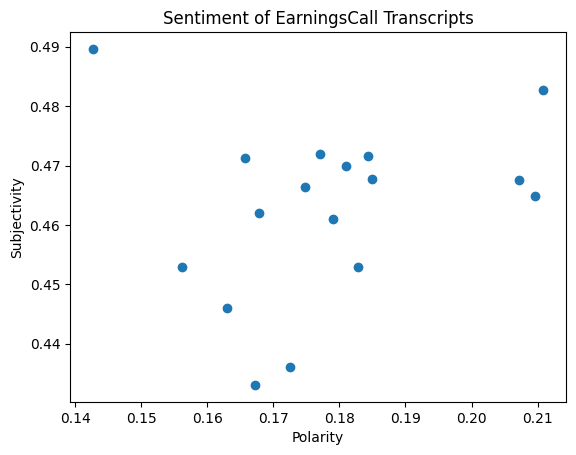

In [113]:
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y)
ax.set(title="Sentiment of EarningsCall Transcripts",
      xlabel='Polarity', ylabel='Subjectivity')
plt.show()